In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files

Natoms = 8
dim = 3
Nmin = 8
beta = 10

In [2]:
def read_FEdata_files(beta):
    fname = "Data/LJ"+str(Natoms) + "free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix



def read_Mdata_files(entry,beta):
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix

def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y


In [3]:
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y
    

In [4]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)

129
129
1.3843531019e-02
3.7051424446e-02
 -1.8243780790e-02
1.7537281897e+00
 -3.2726276173e+00
1.4699547118e+00
129
129
0.013843531019
0.037051424446
-0.01824378079
1.7537281897
-3.2726276173
1.4699547118


In [5]:
# read data files
FE, bicubic_matrix = read_FEdata_files(beta)
M11, M11_bicubic_matrix = read_Mdata_files(11,beta)
M12, M12_bicubic_matrix = read_Mdata_files(12,beta)
M22, M22_bicubic_matrix = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [6]:
# visualize the free energy
mu2grid = np.linspace(val1_min,val1_max,N1)
mu3grid = np.linspace(val2_min,val2_max,N1)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

In [7]:
# define collective variables: 2nd and 3rd central moments of coordination numbers
def Dist_Sq_Matrix(x): # matrix of distances squared
    Na = np.size(x,axis = 1)
    D2 = np.zeros((Na,Na))
    for j in range(Na):
        D2[j,:] = (x[0,:]-x[0,j])**2 + (x[1,:]-x[1,j])**2 + (x[2,:]-x[2,j])**2
    return D2

def CV(x):
    Na = np.size(x,axis = 1)
    D2 = Dist_Sq_Matrix(x)
    coord_num = np.zeros((Na,))
    for j in range(Na):
        ind = np.setdiff1d(range(Na),np.array([j]))
        aux = (D2[j,ind]/2.25)**4
        coord_num[j] = np.sum((np.ones((1,Na-1))-aux)/(np.ones((1,Na-1))-aux**2))
    cmean = np.mean(coord_num)
    mu2 = np.mean((coord_num-cmean)**2)
    mu3 = np.mean((coord_num-cmean)**3)
    return mu2,mu3


In [8]:
# load the list of minima and saddles of LJ7 in 2D
XYZlist = np.loadtxt('LJ8data/min_xyz.csv', delimiter=',', dtype=float)
# format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
CVlist = np.zeros((Nmin,2))
for j in range(Nmin):
    CVlist[j,0],CVlist[j,1] = CV(np.reshape(XYZlist[3*j:3*(j+1),:],(dim,Natoms)))


In [9]:
# #load MEP
# MEPxyz = np.loadtxt('StringLJ8_Min2-Min4.csv', delimiter=',', dtype=float)
# # format: each row x0,y0,z0,x1,y1,z1,....,x7,y7,z7
# Nmep = np.size(MEPxyz,axis=0)
# CVmep = np.zeros((Nmep,2))
# for j in range(Nmep):
#     CVmep[j,0],CVmep[j,1] = CV(np.transpose(np.reshape(MEPxyz[j,:],(Natoms,dim))))


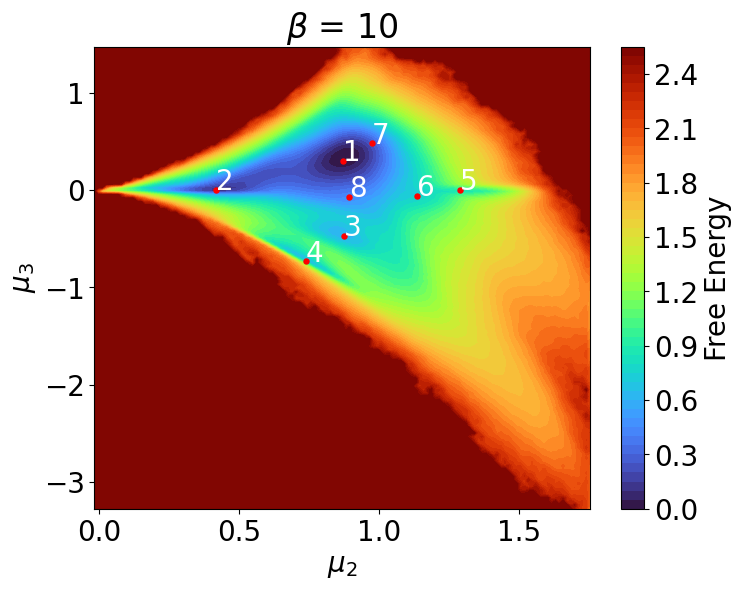

In [10]:
fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.plot(CVmep[:,0],CVmep[:,1],color = "white")
# print(CVlist)
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'white')
#     #axes.set_aspect(1)
plt.savefig(fig_name)

[[ 2.00000000e-01  0.00000000e+00]
 [ 6.00000000e-01  5.00000000e-02]
 [ 5.00000000e-01 -3.00000000e-01]
 [ 7.00000000e-01  5.00000000e-01]
 [ 9.00000000e-01  1.00000000e+00]
 [ 7.00000000e-01 -2.00000000e-01]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.20000000e+00 -1.10000000e+00]
 [ 1.20000000e+00 -5.00000000e-01]
 [ 1.50000000e+00 -5.00000000e-01]
 [ 1.20000000e+00  5.00000000e-01]
 [ 8.69696741e-01  2.98093664e-01]
 [ 4.17495969e-01  2.77555756e-16]
 [ 8.75230658e-01 -4.69150598e-01]
 [ 7.38658392e-01 -7.33052067e-01]
 [ 1.28780746e+00 -2.22044605e-16]
 [ 1.13423594e+00 -5.83556682e-02]
 [ 9.73548736e-01  4.77902225e-01]
 [ 8.91860393e-01 -7.24734145e-02]]


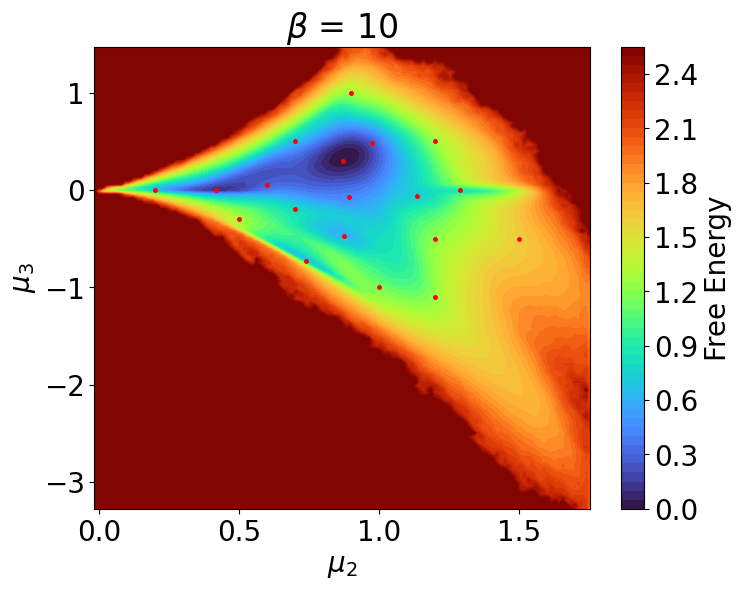

In [84]:
fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_confs.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))


XYlist = np.array([[0.2,0],[0.6,0.05],[0.5,-0.3],[0.7,0.5],[0.9,1.],[0.7,-0.2],\
                   [1.,-1.],[1.2,-1.1],[1.2,-0.5],[1.5,-0.5],[1.2,0.5]])
ind = [0,1,2,3,4,5,6,7]
XYlist = np.concatenate((XYlist,CVlist[ind,:]),axis = 0)
print(XYlist)

plt.scatter(XYlist[:,0],XYlist[:,1],s = 5, c = 'red')

np.savetxt('Figures/mu2mu3_list.csv', XYlist, delimiter=',')


plt.scatter(XYlist[:,0],XYlist[:,1],s = 5, c = 'red')

plt.savefig(fig_name)

In [75]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,6))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    N2,N1 = np.shape(func)
    scale = 0.003
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

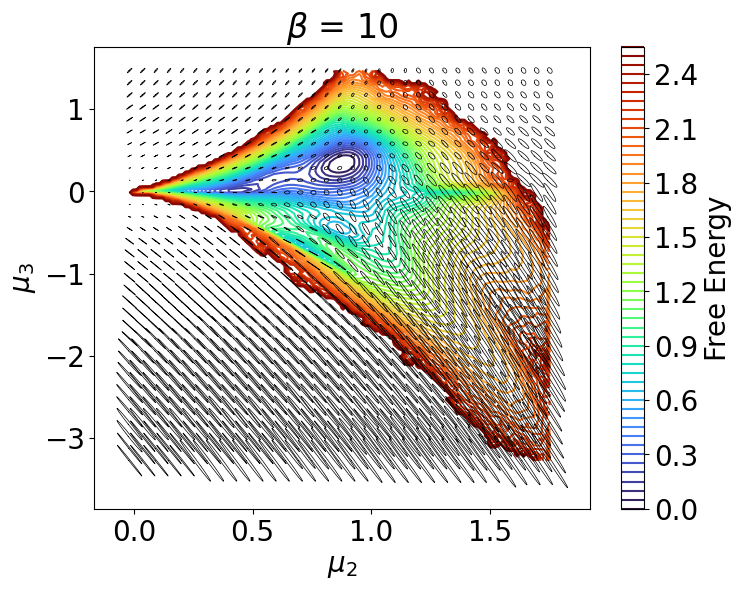

In [13]:
step = 4
fname = "Figures/LJ"+str(Natoms)+"_FE_DiffMatr_beta"+str(beta)+".pdf"
visualize_diffusion_matrix(FE,M11,M12,M22,beta,step,mu2grid,mu3grid,"Free Energy",fname)

In [14]:
# #load MEP
# WTMetad_data = np.loadtxt('Data/WTMetad_data_10000.csv', delimiter=',', dtype=float)
# Ndata = np.size(WTMetad_data,axis = 0)
# print("Ndata = ",Ndata)
# # format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
# CVlist = np.zeros((Ndata,2))
# for j in range(Ndata):
#     CVlist[j,0],CVlist[j,1] = CV(np.reshape(WTMetad_data[j,:],(dim,Natoms)))

# fig_name = "Figures/WTMetad_data.pdf"
# plt.rcParams.update({'font.size': 20})
# # plt.figure(figsize=(16,16))
# # ax = fig.add_subplot(111)
# plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
# cbar = plt.colorbar()
# cbar.set_label("Free Energy", size=20)
# plt.xlabel(r'$\mu_2$')
# plt.ylabel(r'$\mu_3$')
# plt.title(f"WTMetad data, {Ndata} points, beta = {beta}")
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.savefig(fig_name)

In [15]:
# #load MEP
# WTMetad_data = np.loadtxt('Data/WTMetad_data_20000.csv', delimiter=',', dtype=float)
# Ndata = np.size(WTMetad_data,axis = 0)
# print("Ndata = ",Ndata)
# # format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
# CVlist = np.zeros((Ndata,2))
# for j in range(Ndata):
#     CVlist[j,0],CVlist[j,1] = CV(np.reshape(WTMetad_data[j,:],(dim,Natoms)))

# fig_name = "Figures/WTMetad_data.pdf"
# plt.rcParams.update({'font.size': 20})
# # plt.figure(figsize=(16,16))
# # ax = fig.add_subplot(111)
# plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
# cbar = plt.colorbar()
# cbar.set_label("Free Energy", size=20)
# plt.xlabel(r'$\mu_2$')
# plt.ylabel(r'$\mu_3$')
# plt.title(f"WTMetad data, {Ndata} points, beta = {beta}")
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.savefig(fig_name)

In [16]:
# #load MEP
# bin_data = np.loadtxt('Data/LJ8bins_confs_list.csv', delimiter=',', dtype=float)
# # format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
# Ndata = np.size(bin_data,axis = 0)
# print("Ndata = ",Ndata)
# CVlist = np.zeros((Ndata,2))
# for j in range(Ndata):
#     CVlist[j,0],CVlist[j,1] = CV(np.reshape(bin_data[j,:],(dim,Natoms)))

# mep21 = np.loadtxt('StringLJ8_Min2-Min1.csv',delimiter=',', dtype=float)  
# # format: each row: x0,y0,z0,x1,y1,z1,...,x7,y7,z7
# Nmep = np.size(mep21,axis=0)
# CVmep = np.zeros((Nmep,2))
# dxyz = np.sqrt(np.sum((mep21 - np.roll(mep21,1,axis = 0))**2,axis=1))
# dxyz[0] = 0
# arclength = np.cumsum(dxyz)
# print(arclength)
# for j in range(Nmep):
#     CVmep[j,0],CVmep[j,1] = CV(np.transpose(np.reshape(mep21[j,:],(Natoms,dim))))
    
# fig_name = "Figures/bin_data.pdf"
# plt.rcParams.update({'font.size': 20})
# # plt.figure(figsize=(16,16))
# # ax = fig.add_subplot(111)
# plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
# cbar = plt.colorbar()
# cbar.set_label("Free Energy", size=20)
# plt.xlabel(r'$\mu_2$')
# plt.ylabel(r'$\mu_3$')
# plt.title(f"Bin data, {Ndata} points, beta = {beta}")
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.plot(CVmep[:,0],CVmep[:,1],linewidth=5)
# plt.savefig(fig_name)

level set for A and B, len =  2
level set for the outer boundary, len =  3
46
108
936


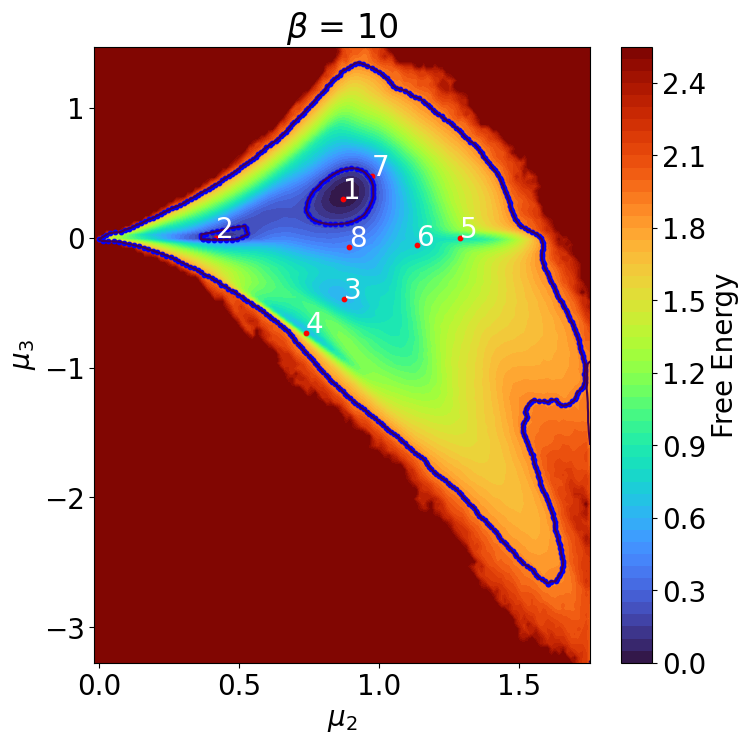

In [17]:
# Committor Problem
from distmesh import *
from FEM_TPT import *
CV1grid = mu2grid
CV2grid = mu3grid

# fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r"$\mu_2$")
plt.ylabel(r"$\mu_3$")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'white')


cv1mesh,cv2mesh = np.meshgrid(CV1grid,CV2grid)

feB = 0.2
if beta == 10:
    fe_outer = 1.88
    lset_index = 2
elif beta == 15:
    fe_outer = 1.78
    lset_index = 0
elif beta == 20:
    fe_outer = 1.68
    lset_index = 0

cB = plt.contour(CV1grid,CV2grid,FE, [feB])
# vertsB = extract_contour(cB)
# plt.scatter(vertsB[:,0],vertsB[:,1],s = 10, c = 'blue')

# the desired size of mesh edge
h = 0.02

# set B around minimum 0
level_set_points = []
level_set = cB.allsegs[0] # all connected components
print("level set for A and B, len = ",len(level_set))
Abdry = level_set[0] # the first connected component
Abdry = reparametrization(Abdry,h) 
plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'blue')

Bbdry = level_set[1] # the first connected component
Bbdry = reparametrization(Bbdry,h) 
plt.scatter(Bbdry[:,0],Bbdry[:,1],s = 10, c = 'blue')

# the outer boundary
outer_bdry = plt.contour(CV1grid,CV2grid,FE, [fe_outer])
level_set = outer_bdry.allsegs[0]
print("level set for the outer boundary, len = ",len(level_set))
Obdry = level_set[lset_index]
Obdry = reparametrization(Obdry,h)
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'blue')

dirname = "FEMdataBETA"+str(beta)+"/"
fbdry_name = ["A_bdry.csv","B_bdry.csv","O_bdry.csv"]
Abdry.tofile(dirname+fbdry_name[0], sep = ',')
Bbdry.tofile(dirname+fbdry_name[1], sep = ',')
Obdry.tofile(dirname+fbdry_name[2], sep = ',')

print(np.size(Abdry))
print(np.size(Bbdry))
print(np.size(Obdry))

OmegaAB: Npts =  6401  Ntri =  11720
A: NptsA =  100  NtriA =  154
B: NptsB =  395  NtriB =  682


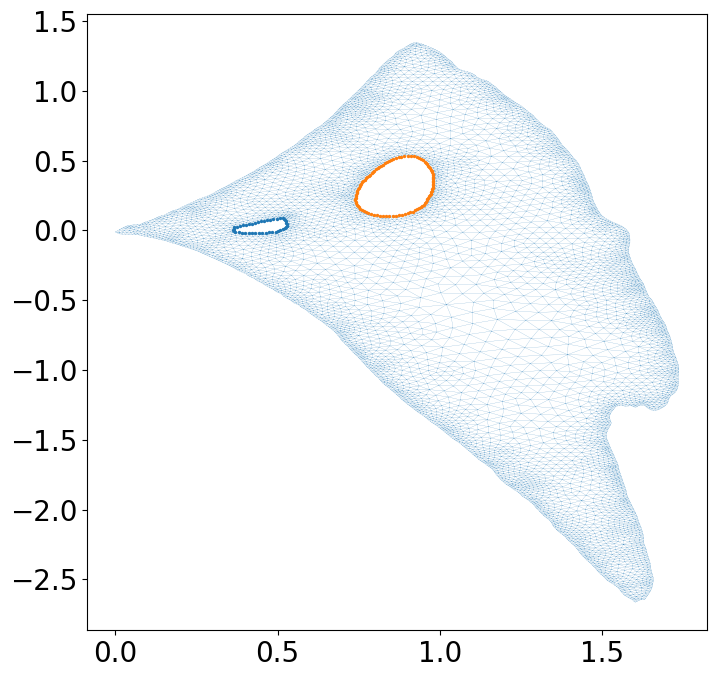

In [18]:
# The triangulation is done using Darren Engwirda's triangulation package mesh2D
# https://github.com/dengwirda/mesh2d?tab=readme-ov-file

# Read the triangulation files
Aind = np.loadtxt(dirname +"Abdry.csv", delimiter=',', dtype=int)
Bind = np.loadtxt(dirname +"Bbdry.csv", delimiter=',', dtype=int)
pts = np.loadtxt(dirname +"pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname +"tri.csv", delimiter=',', dtype=int)
triA = np.loadtxt(dirname +"triA.csv", delimiter=',', dtype=int)
triB = np.loadtxt(dirname +"triB.csv", delimiter=',', dtype=int)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)


In [19]:
# ise the bicubic interpolation to interpolate the free energy and the diffusion matrix 
# to the nodes of the triangulated mesh

# FE7, bicubic_matrix7 = read_FEdata_files(beta)
# M11_7, M11_bicubic_matrix7 = read_Mdata_files(11,beta)
# M12_7, M12_bicubic_matrix7 = read_Mdata_files(12,beta)
# M22_7, M22_bicubic_matrix7 = read_Mdata_files(22,beta)

Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

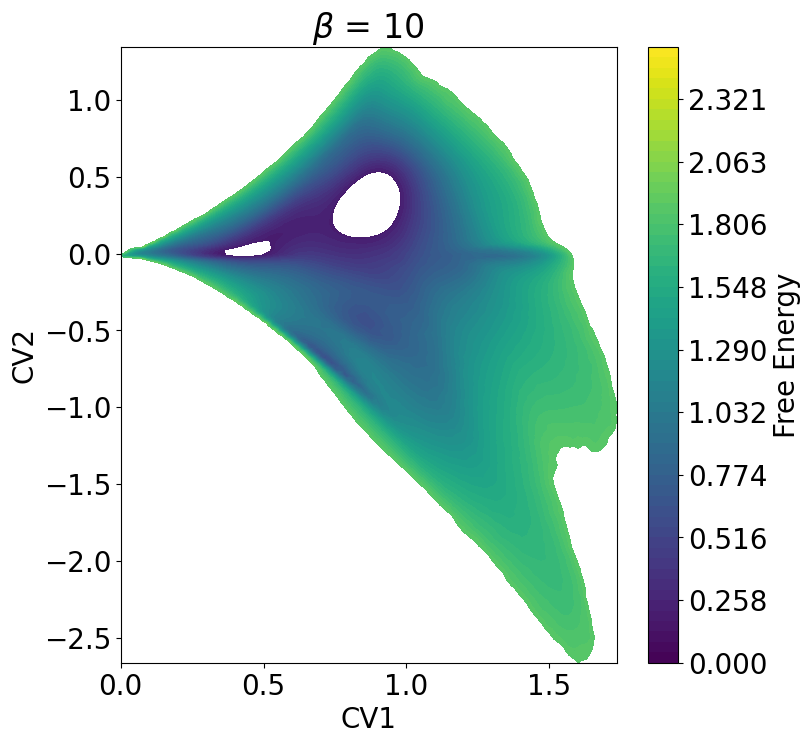

In [20]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.linspace(np.min(FE),np.max(FE),60) )
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [21]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)
print(np.min(q))
print(np.max(q))

0.0
1.0


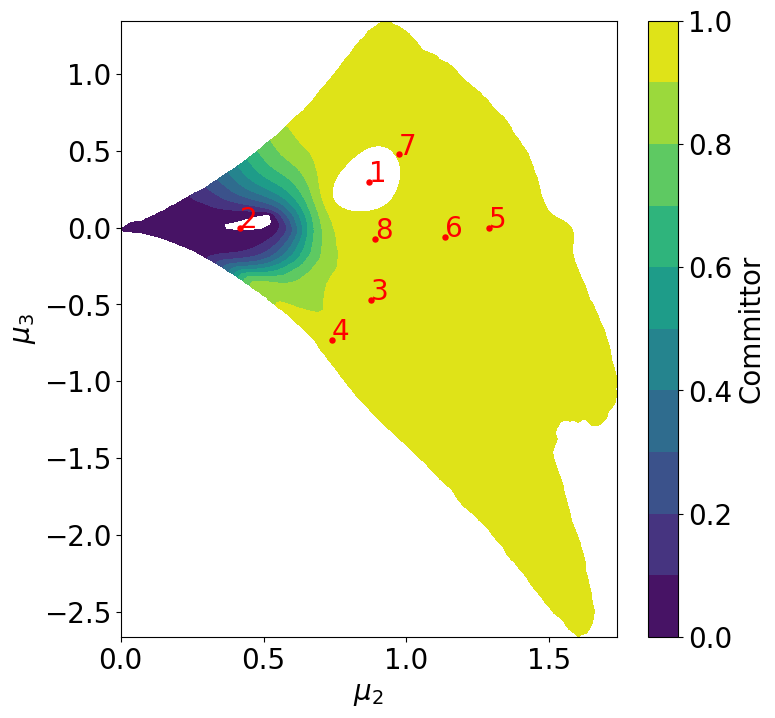

In [22]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([np.min(q),0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,np.max(q)]))
plt.colorbar(label="Committor", orientation="vertical")
plt.xlabel(r"$\mu_2$")
plt.ylabel(r"$\mu_3$")
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'red')
plt.rcParams.update({'font.size': 20})
fname = "Figures/Committor_min01_mu23_BETA"+str(beta)+".pdf"
plt.savefig(fname)

In [23]:
dirname = "FEMdataBETA" + str(beta) + "/Committor_mu2mu3_BETA" + str(beta) + "/"
A1 = np.loadtxt(dirname +"A1.csv", delimiter=',', dtype=float)
A2 = np.loadtxt(dirname +"A2.csv", delimiter=',', dtype=float)
A3 = np.loadtxt(dirname +"A3.csv", delimiter=',', dtype=float)
A4 = np.loadtxt(dirname +"A4.csv", delimiter=',', dtype=float)
b1 = np.loadtxt(dirname +"b1.csv", delimiter=',', dtype=float)
b2 = np.loadtxt(dirname +"b2.csv", delimiter=',', dtype=float)
b3 = np.loadtxt(dirname +"b3.csv", delimiter=',', dtype=float)
b4 = np.loadtxt(dirname +"b4.csv", delimiter=',', dtype=float)

def ReLU(x):
    return np.maximum(x,0)

def sigmoid(x):
    return 1./(1.+np.exp(-x))
    
def NNRC(xy):
    w1 = ReLU(A1@xy + b1)
    w2 = ReLU(A2@w1 + b2)
    w3 = ReLU(A3@w2 + b3)
    return sigmoid(A4@w3 + b4)
    
Npts = np.size(pts,axis = 0)
RC = np.zeros((Npts,))
for j in range(Npts):
    RC[j] = NNRC(pts[j,:])
    

In [24]:
def read_bins_data(fname):
    # read free energy
    bins = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            # print(line)
            values = [int(value) for value in line.split()]
            # print(values)
            bins.append(values)
        print(np.shape(bins))
        bins = np.array(bins)
        print(np.shape(bins))
    
    return bins

In [25]:
fname = "Data/RtrajStochControl/Rtraj_bins_beta"+str(beta)+".txt"
bins = read_bins_data(fname)
muR = np.array(np.transpose(bins),dtype = float)
Z = np.sum(muR)*h1*h2
print(Z)
muR = muR/Z
for i in range(N2):
    for j in range(N1):
        if bins[j,i] == 0:
            muR[i,j] = np.nan

(129, 129)
(129, 129)
21456.391705365404


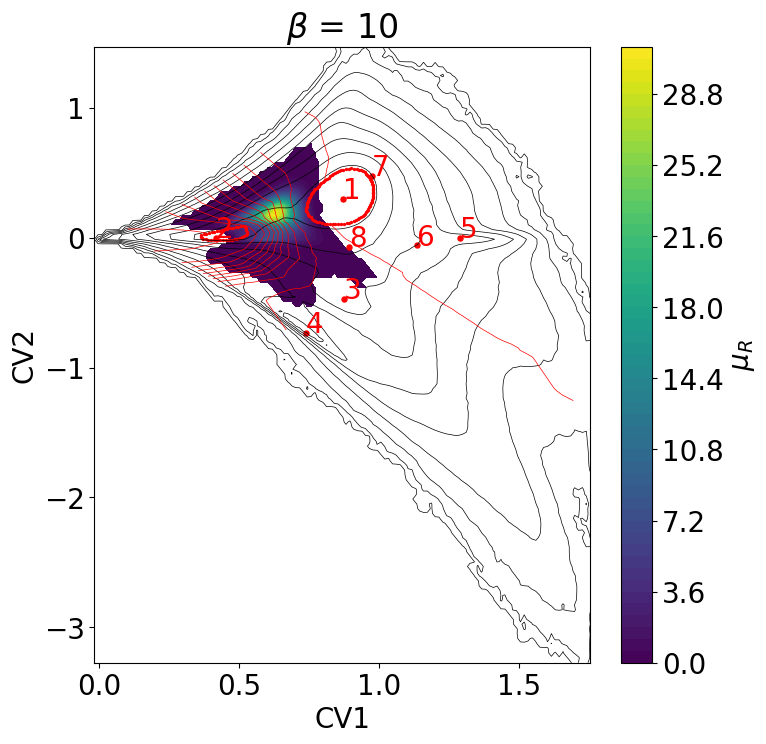

In [26]:
milestones = np.array([1.0e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,muR,levels = 60)
cbar = plt.colorbar()
cbar.set_label(r'$\mu_R$', size=20)
plt.contour(CV1grid,CV2grid,FE, levels=10, colors='black', linewidths=0.5) #cmap='turbo')
plt.tricontour(pts[:,0], pts[:,1],tri,RC,milestones,colors = 'red', linewidths=0.5)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'red')

plt.scatter(pts[Aind,0],pts[Aind,1],s = 2,c = 'red')
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2,c = 'red')

axes=plt.gca()
figname = "Figures/ProbDensityRtraj_beta"+str(beta)+".pdf"
plt.savefig(figname)